In [1]:
import pandas as pd
import numpy as np
import sys
from itertools import combinations, groupby
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orders= pd.read_csv("Data/orders.csv")
aisles=pd.read_csv("Data/aisles.csv")
product_priors=pd.read_csv("Data/order_products__prior.csv")
product_train=pd.read_csv("Data/order_products__train.csv")
dept=pd.read_csv("Data/departments.csv")
products=pd.read_csv("Data/products.csv")

In [3]:
from sklearn.model_selection import train_test_split

(138461, 25)

In [4]:
pro = pd.merge(products,dept,on='department_id')
pro.head()

,product_id,product_name,aisle_id,department_id,department
0,1,Chocolate Sandwich Cookies,61,19,snacks
1,16,Mint Chocolate Flavored Syrup,103,19,snacks
2,25,Salted Caramel Lean Protein & Fiber Bar,3,19,snacks
3,32,Nacho Cheese White Bean Chips,107,19,snacks
4,41,Organic Sourdough Einkorn Crackers Rosemary,78,19,snacks


In [5]:
product = pro[['product_id','product_name','department']]
product.head()

,product_id,product_name,department
0,1,Chocolate Sandwich Cookies,snacks
1,16,Mint Chocolate Flavored Syrup,snacks
2,25,Salted Caramel Lean Protein & Fiber Bar,snacks
3,32,Nacho Cheese White Bean Chips,snacks
4,41,Organic Sourdough Einkorn Crackers Rosemary,snacks


In [6]:
df = pd.merge(products,aisles,on='aisle_id')
df

,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes
2,102,Danish Butter Cookies,61,19,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes
...,...,...,...,...,...
49683,47769,Peas and Potatoe Roti Paratha,76,6,indian foods
49684,48292,Punjabi Chhole Chickpeas with Potatoes & Onions,76,6,indian foods
49685,48480,Punjab Eggplant,76,6,indian foods
49686,48830,Pav Bhaji Mashed Vegetable Curry,76,6,indian foods


In [7]:
df = pd.merge(df,dept,on='department_id')
df

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks
2,102,Danish Butter Cookies,61,19,cookies cakes,snacks
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes,snacks
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes,snacks
...,...,...,...,...,...,...
49683,22827,Organic Black Mission Figs,18,10,bulk dried fruits vegetables,bulk
49684,28655,Crystallized Ginger Chunks,18,10,bulk dried fruits vegetables,bulk
49685,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk
49686,38007,Naturally Sweet Plantain Chips,18,10,bulk dried fruits vegetables,bulk


In [8]:
product_df = df

In [9]:
product_df.drop(['product_name','department_id','aisle'],axis=1,inplace=True)
product_df

,product_id,aisle_id,department
0,1,61,snacks
1,78,61,snacks
2,102,61,snacks
3,172,61,snacks
4,285,61,snacks
...,...,...,...
49683,22827,18,bulk
49684,28655,18,bulk
49685,30365,18,bulk
49686,38007,18,bulk


In [10]:
product_df = product_df['department'].str.get_dummies(sep='|')
product_df.head()

,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
product_data = pd.merge(product,product_df, left_index=True, right_index=True)
product_data

,product_id,product_name,department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
0,1,Chocolate Sandwich Cookies,snacks,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,16,Mint Chocolate Flavored Syrup,snacks,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,25,Salted Caramel Lean Protein & Fiber Bar,snacks,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,32,Nacho Cheese White Bean Chips,snacks,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,41,Organic Sourdough Einkorn Crackers Rosemary,snacks,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49683,43769,Organic Pearled Barley,bulk,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
49684,45682,Organic Turkish Apricots,bulk,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
49685,46889,Organic Brown Basmati Rice,bulk,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
49686,47489,Organic Brown Jasmine Rice,bulk,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
product_data.drop(['department'], axis = 1,inplace=True)
product_data

,product_id,product_name,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
0,1,Chocolate Sandwich Cookies,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,16,Mint Chocolate Flavored Syrup,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,25,Salted Caramel Lean Protein & Fiber Bar,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,32,Nacho Cheese White Bean Chips,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,41,Organic Sourdough Einkorn Crackers Rosemary,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49683,43769,Organic Pearled Barley,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49684,45682,Organic Turkish Apricots,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49685,46889,Organic Brown Basmati Rice,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49686,47489,Organic Brown Jasmine Rice,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
product_data.head()

,product_id,product_name,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
0,1,Chocolate Sandwich Cookies,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,16,Mint Chocolate Flavored Syrup,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,25,Salted Caramel Lean Protein & Fiber Bar,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,32,Nacho Cheese White Bean Chips,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,41,Organic Sourdough Einkorn Crackers Rosemary,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
df_user = pd.merge(product_train,orders,on='order_id')
df_user.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
2,1,10246,3,0,112108,train,4,4,10,9.0
3,1,49683,4,0,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0


In [15]:
df_user.head(20)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
2,1,10246,3,0,112108,train,4,4,10,9.0
3,1,49683,4,0,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0
5,1,13176,6,0,112108,train,4,4,10,9.0
6,1,47209,7,0,112108,train,4,4,10,9.0
7,1,22035,8,1,112108,train,4,4,10,9.0
8,36,39612,1,0,79431,train,23,6,18,30.0
9,36,19660,2,1,79431,train,23,6,18,30.0


In [16]:
df_user = df_user.groupby(["user_id", "product_id"])["reordered"].aggregate(['sum','count']).reset_index()
df_user.head(10)

,user_id,product_id,sum,count
0,1,196,1,1
1,1,10258,1,1
2,1,13032,1,1
3,1,25133,1,1
4,1,26088,1,1
5,1,26405,1,1
6,1,27845,0,1
7,1,38928,1,1
8,1,39657,1,1
9,1,46149,1,1


In [17]:
df_user['reordered']= df_user['sum']/df_user['count']
df_user

,user_id,product_id,sum,count,reordered
0,1,196,1,1,1.0
1,1,10258,1,1,1.0
2,1,13032,1,1,1.0
3,1,25133,1,1,1.0
4,1,26088,1,1,1.0
...,...,...,...,...,...
1384612,206209,24852,1,1,1.0
1384613,206209,37966,0,1,0.0
1384614,206209,39216,1,1,1.0
1384615,206209,40603,0,1,0.0


In [18]:
df_user['reordered'].unique()

array([1., 0.])

In [ ]:
# df_user_cnt=df_user.groupby(['user_id','product_id'])['reordered_val'].aggregate(['sum','count'])
# df_user_cnt['zero'] = df_user_cnt['count']- df_user_cnt['sum']
# df_user_cnt = df_user_cnt.reset_index()
# df_user_cnt

In [16]:
# df_user_cnt['reordered_val'] = df_user_cnt.apply(lambda row: 1 if row['sum'] >= row['zero'] else 0,axis=1)
# df_user_cnt.drop(['sum','count','zero'], axis = 1,inplace=True)

In [19]:
df_user_cnt = df_user.drop(['sum','count'],axis=1)
df_user_cnt

,user_id,product_id,reordered
0,1,196,1.0
1,1,10258,1.0
2,1,13032,1.0
3,1,25133,1.0
4,1,26088,1.0
...,...,...,...
1384612,206209,24852,1.0
1384613,206209,37966,0.0
1384614,206209,39216,1.0
1384615,206209,40603,0.0


In [20]:
product_data_df = pd.merge(df_user_cnt,product_data,on='product_id')
product_data_df.head()

,user_id,product_id,reordered,product_name,alcohol,babies,bakery,beverages,breakfast,bulk,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
0,1,196,1.0,Soda,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,67,196,1.0,Soda,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,676,196,1.0,Soda,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,760,196,1.0,Soda,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,804,196,0.0,Soda,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
train, test = train_test_split(product_data_df, test_size=0.93)
train.shape

(96923, 25)

In [27]:
train.to_csv('product_data_df.csv',sep=',')

In [30]:
product_data_df

,user_id,product_id,reordered,product_name,alcohol,babies,bakery,beverages,breakfast,bulk,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
0,1,196,1.0,Soda,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,67,196,1.0,Soda,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,676,196,1.0,Soda,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,760,196,1.0,Soda,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,804,196,0.0,Soda,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,206110,22165,0.0,Chewy Reduced Sugar Granola Bars Variety Pack,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1384613,206125,31540,0.0,Plain Flavor Probiotic Acidophilus,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1384614,206149,44507,1.0,"100% Juice, Rio Red Grapefruit",0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1384615,206155,47814,1.0,Puppy Complete Nutrition Chicken & Beef Dinner...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
reorder_mean_count = pd.DataFrame(product_data_df.groupby('product_name')['reordered'].mean())
reorder_mean_count.head()

,reordered
product_name,
#2 Coffee Filters,0.363636
#2 Cone White Coffee Filters,0.000000
#2 Mechanical Pencils,0.000000
#4 Natural Brown Coffee Filters,0.166667
& Go! Hazelnut Spread + Pretzel Sticks,0.600000


In [22]:
reorder_mean_count['reorder_counts'] = pd.DataFrame(product_data_df.groupby('product_name')['reordered'].count())
reorder_mean_count.head()

,reordered,reorder_counts
product_name,,
#2 Coffee Filters,0.363636,22
#2 Cone White Coffee Filters,0.000000,1
#2 Mechanical Pencils,0.000000,1
#4 Natural Brown Coffee Filters,0.166667,6
& Go! Hazelnut Spread + Pretzel Sticks,0.600000,10


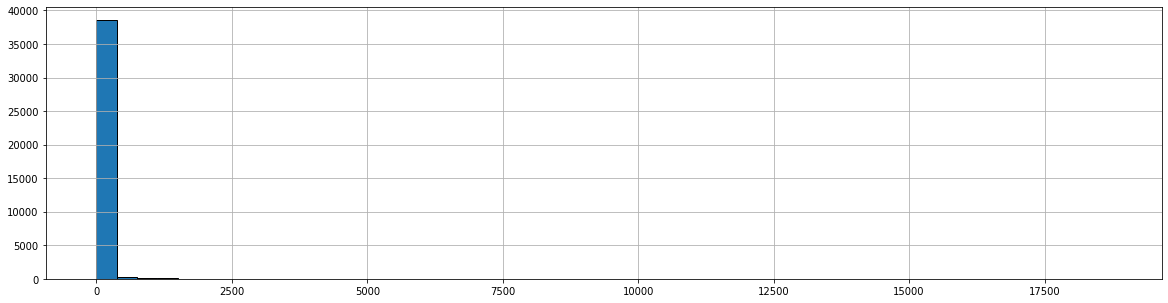

In [23]:
plt.figure(figsize=(20,5))
plt.rcParams['patch.force_edgecolor'] = True
reorder_mean_count['reorder_counts'].hist(bins=50)
plt.show()

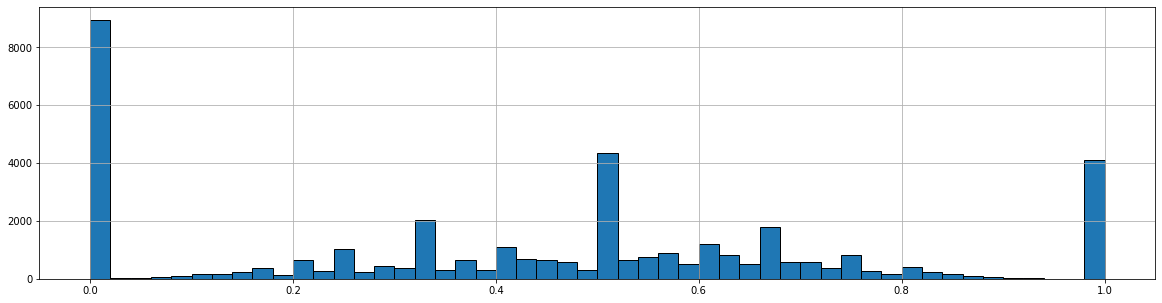

In [24]:
plt.figure(figsize=(20,5))
plt.rcParams['patch.force_edgecolor'] = True
reorder_mean_count['reordered'].hist(bins=50)
plt.show()

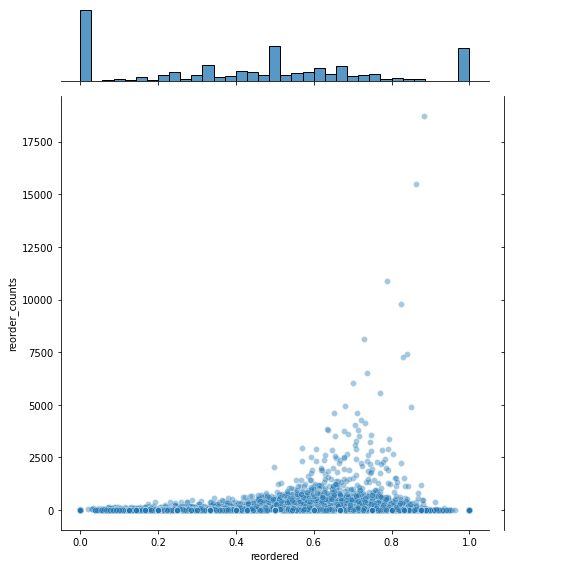

In [25]:
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='reordered', y='reorder_counts', data=reorder_mean_count, alpha=0.4,height=8)
plt.show()

In [43]:
train.product_name

1210585                  Boneless Pork Shoulder Butt
968369                                Bag of Oranges
217757                    Organic Hothouse Cucumbers
983462                                          Lime
1260417                Condensed Chicken Noodle Soup
                             ...                    
1276475      1/3 Less Fat Chive & Onion Cream Cheese
1154363    Alcohol-Free Witch Hazel Rose Petal Toner
739053               50/50 Spring Mix & Baby Spinach
893363       Original Diced Tomatoes & Green Chilies
973406                 Toasted Pine Nut Couscous Mix
Name: product_name, Length: 96923, dtype: object

In [34]:
user_reorder_data = train.pivot_table(index='user_id',columns='product_name',values='reordered')
user_reorder_data.head()

product_name,#4 Natural Brown Coffee Filters,& Go! Hazelnut Spread + Pretzel Sticks,0 Calorie Fuji Apple Pear Water Beverage,0% Fat Blueberry Greek Yogurt,0% Fat Free Organic Milk,0% Fat Organic Greek Vanilla Yogurt,0% Greek Strained Yogurt,0% Greek Yogurt Black Cherry on the Bottom,"0% Greek, Blueberry on the Bottom Yogurt",1 % Lowfat Milk,...,go fresh Cool Moisture Beauty,in Gravy with Carrots Peas & Corn Mashed Potatoes & Meatloaf Nuggets,of Hanover 100 Calorie Pretzels Mini,pumpkin spice,rich kiss Olive & Aloe Moisturizer 2 in 1,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate,with Crispy Almonds Cereal,with Olive Oil Mayonnaise,with a Splash of Mango Coconut Water
user_id,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
user_reorder_data.fillna(0,inplace=True)
user_reorder_data.head()

product_name,#4 Natural Brown Coffee Filters,& Go! Hazelnut Spread + Pretzel Sticks,0 Calorie Fuji Apple Pear Water Beverage,0% Fat Blueberry Greek Yogurt,0% Fat Free Organic Milk,0% Fat Organic Greek Vanilla Yogurt,0% Greek Strained Yogurt,0% Greek Yogurt Black Cherry on the Bottom,"0% Greek, Blueberry on the Bottom Yogurt",1 % Lowfat Milk,...,go fresh Cool Moisture Beauty,in Gravy with Carrots Peas & Corn Mashed Potatoes & Meatloaf Nuggets,of Hanover 100 Calorie Pretzels Mini,pumpkin spice,rich kiss Olive & Aloe Moisturizer 2 in 1,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate,with Crispy Almonds Cereal,with Olive Oil Mayonnaise,with a Splash of Mango Coconut Water
user_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
user_reorder_data['0% Fat Organic Greek Vanilla Yogurt']

user_id
2         0.0
7         0.0
8         0.0
9         0.0
13        0.0
         ... 
206196    0.0
206200    0.0
206203    0.0
206205    0.0
206209    0.0
Name: 0% Fat Organic Greek Vanilla Yogurt, Length: 61921, dtype: float64

In [45]:
def recommend(sample,min_rating_counts):
    input_ratings = user_reorder_data[sample]
    like_input = user_reorder_data.corrwith(input_ratings)
    corr_input = pd.DataFrame(like_input, columns=['Correlation'])
    corr_input.dropna(inplace=True)
    corr_input.sort_values('Correlation', ascending=False)
    corr_input = corr_input.join(reorder_mean_count['reorder_counts'])
    corr_input=corr_input[
        corr_input['reorder_counts']>min_rating_counts
    ].sort_values('Correlation', ascending=False)
    corr_input = corr_input.reset_index()
    corr_input.index = corr_input.index + 1
    return corr_input.head(10)

In [50]:
import random
product=random.choice(train.product_name.unique())
print("Recommendation for Product :  {}\n".format(product))
suggestion=recommend(product,reorder_mean_count.reorder_counts.median())
if(len(suggestion)==0):
    print("Not enough reorder to Recommend other Products")
else:
    print(suggestion['product_name'])

Recommendation for Product :  Marketplace Cheese Tortellini in a Roasted Red Pepper Sauce with Aged Parmesan Cheese, Organic

1     Marketplace Cheese Tortellini in a Roasted Red...
2                                          Baby Carrots
3                            Fat Free Strawberry Yogurt
4             Vanilla Bean & Honey Yogurt Protein Drink
5                           Super Antioxidant Green Tea
6        Lunchables Ham & Cheddar with Cracker Stackers
7          Medleys Assorted Fruit Fruit Flavored Snacks
8                           Organic Carrots & Ranch Dip
9                           Sliced Sharp Cheddar Cheese
10                         Lean, Seasoned Turkey Burger
Name: product_name, dtype: object
